In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

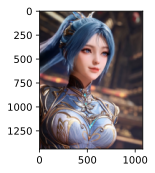

In [5]:
d2l.set_figsize()
img=d2l.Image.open('../data/winter.jpg')
d2l.plt.imshow(img)

In [6]:
#大多数图像增广方法都具有一定的随机性
#apply方法在输入图像img上多次使用图像增广方法，并显示结果
def apply(img,aug,rows=2,cols=4,scale=1.5):
    Y=[aug(img) for _ in range(rows*cols)]
    d2l.show_images(Y,rows,cols,scale=scale)

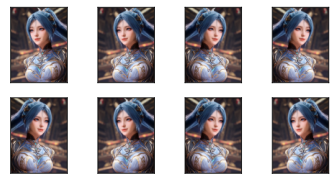

In [7]:
#(1)横向翻转
apply(img,torchvision.transforms.RandomHorizontalFlip())

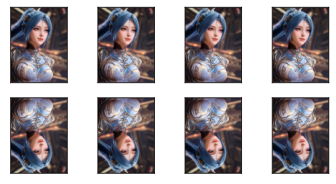

In [8]:
#(2)纵向翻转
apply(img,torchvision.transforms.RandomVerticalFlip())

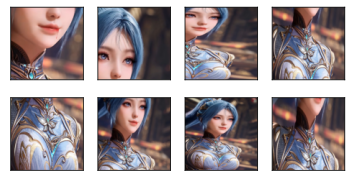

In [ ]:
#(3)裁剪
#size:输出图像的大小将被调整为 200x200 像素
#scale:指定随机裁剪区域的面积相对于原始图像面积的比例范围
#ratio:指定随机裁剪区域的宽高比范围
shape_aug=torchvision.transforms.RandomResizedCrop((200,200),scale=(0.1,1),ratio=(0.5,2))
apply(img,shape_aug)

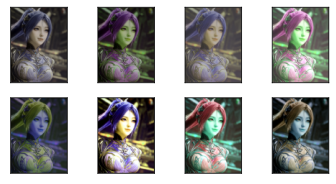

In [10]:
#(4)颜色
apply(img,torchvision.transforms.ColorJitter(brightness=0.5,contrast=0.5,saturation=0.5,hue=0.5))

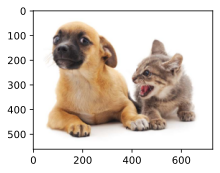

In [25]:
d2l.set_figsize()
img2=d2l.plt.imread('../data/catdog.jpg')
d2l.plt.imshow(img2)

In [14]:
#边界框两种表示法之间的转换
#(x1,y1,x2,y2)->(cx,cy,width,high)
def box_corner_to_center(boxes):
    x1,y1,x2,y2=boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
    cx=(x1+x2)/2
    cy=(y1+y2)/2
    w=x2-x1
    h=y2-y1
    boxes=torch.stack((cx,cy,w,h),axis=-1)
    return boxes

#(cx,cy,width,high)->(x1,y1,x2,y2)
def box_center_to_corner(boxes):
    cx,cy,w,h=boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
    x1=cx-0.5*w
    x2=cx+0.5*w
    y1=cy-0.5*h
    y2=cy+0.5*h
    boxes=torch.stack((x1,y1,x2,y2),axis=-1)
    return boxes

In [21]:
#验证上面两个函数能否正确转换
dog_bbox,cat_bbox=[60.0,45.0,378.0,516.0],[400.0,112.0,655.0,493.0]
boxes=torch.tensor((dog_bbox,cat_bbox))
box_center_to_corner(box_corner_to_center(boxes))==boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

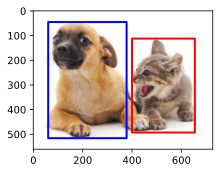

In [26]:
#绘制边界框的函数
def bbox_to_rect(bbox,color):
    return d2l.plt.Rectangle(#Rectangle绘制矩形利用（左上角坐标，宽，高）
        xy=(bbox[0],bbox[1]),width=bbox[2]-bbox[0],height=bbox[3]-bbox[1],fill=False,edgecolor=color,linewidth=2
    )
fig=d2l.plt.imshow(img2)
fig.axes.add_patch(bbox_to_rect(dog_bbox,'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox,'red'))